# A Computer Vision Example

En el ejercicio anterior vimos cómo crear una red neuronal que descubrió el problema que estabas tratando de resolver. Esto dio un ejemplo explícito de comportamiento aprendido. Por supuesto, en ese caso, fue un poco exagerado porque hubiera sido más fácil escribir la función Y = 3x + 1 directamente, en lugar de molestarse en usar Machine Learning para aprender la relación entre X e Y para un conjunto fijo de valores, y extender eso para todos los valores. Pero, ¿qué pasa con un escenario en el que escribir reglas como esa es mucho más difícil, por ejemplo, un problema de visión por computadora? Echemos un vistazo a un escenario en el que podemos reconocer diferentes prendas de vestir, entrenadas a partir de un conjunto de datos que contiene 10 tipos diferentes.

## Start Coding

Comencemos con nuestra importación de TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


## Fashion MNIST dataset
Entrenaremos una red neuronal para reconocer prendas de vestir de un conjunto de datos común llamado Fashion MNIST. Puede obtener más información sobre este conjunto de datos [aquí](https://github.com/zalandoresearch/fashion-mnist).

Este dataset contiene 70,000 prendas de vestir divididos en 10 categorías diferentes. Cada prenda está en una imagen en escala de grises de 28x28 pixeles. Puedes ver algunos ejemplos aquí: ! 

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

Las etiquetas asociadas con el conjunto de datos son:
<table>
<tr><td colspan="1" rowspan="1"><p><strong>Label</strong></p>
</td><td colspan="1" rowspan="1"><p><strong>Description</strong></p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>0</p>
</td><td colspan="1" rowspan="1"><p>T-shirt/top</p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>1</p>
</td><td colspan="1" rowspan="1"><p>Trouser</p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>2</p>
</td><td colspan="1" rowspan="1"><p>Pullover</p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>3</p>
</td><td colspan="1" rowspan="1"><p>Dress</p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>4</p>
</td><td colspan="1" rowspan="1"><p>Coat</p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>5</p>
</td><td colspan="1" rowspan="1"><p>Sandal</p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>6</p>
</td><td colspan="1" rowspan="1"><p>Shirt</p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>7</p>
</td><td colspan="1" rowspan="1"><p>Sneaker</p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>8</p>
</td><td colspan="1" rowspan="1"><p>Bag</p>
</td></tr>
<tr><td colspan="1" rowspan="1"><p>9</p>
</td><td colspan="1" rowspan="1"><p>Ankle boot</p>
</td></tr>
</table>

Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos tf.keras. Lo cargas así:

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a la función `load_data` en este objeto le dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.


In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


¿Cómo son estos valores? 

![texto alternativo](https://codelabs.developers.google.com/codelabs/tensorflow-lab2-computervision/img/36ee87dcbe8317.png)

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver ... Experimente con diferentes índices en la matriz. Por ejemplo, eche un vistazo al índice 42.


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

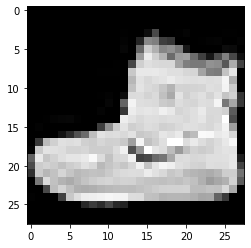

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(training_images[0], cmap ='gray')
print(np.array(training_labels[0],dtype=int))
print(training_images[0])

Notarás que todos los valores de la imagen están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si tratamos todos los valores entre 0 y 1, un proceso llamado **normalización** y afortunadamente en Python es fácil normalizar una lista como esta sin bucles. Lo haces así:

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora te estarás preguntando por qué hay 2 sets ... entrenamiento y pruebas. ¿Recuerdas que hablamos de esto en la introducción? La idea es tener 1 conjunto de datos para el entrenamiento, y luego otro conjunto de datos que el modelo aún no haya visto para ver qué tan bueno es al clasificar nuevas muestras. Después de todo, cuando haya terminado, ¡querrá probarlo con datos que no había visto previamente!

## Model
Ahora diseñemos el modelo. Note que existen algunos conceptos nuevos aquí, como la función `Flatten`

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: Esto define una SECUENCIA de capas en la red neuronal 

**Flatten**: ¿Recuerdas antes dónde nuestras imágenes eran un cuadrado, cuando las imprimiste? Flatten simplemente toma ese cuadrado y lo convierte en un conjunto unidimensional. 

**Dense**: agrega una capa de neuronas. Cada capa de neuronas necesita una **activation function** para decirles qué hacer. Hay muchas opciones, pero solo úsalas por ahora. 

**ReLu** significa efectivamente "Si X> 0 devuelve X, de lo contrario devuelve 0", por lo que lo que hace solo pasa valores 0 o mayores a la siguiente capa en la red. 

**Softmax** toma un conjunto de valores y elige efectivamente el más grande, por ejemplo, si la salida de la última capa se ve como [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05 ], le evita estar buscando el mayor valor, y lo convierte en [0,0,0,0,1,0,0,0,0] - ¡El objetivo es ahorrar mucha codificación!

Lo siguiente que debe hacer, ahora que el modelo está definido, es construirlo realmente. Para ello, compílelo con un optimizador y una función de pérdida como antes, y luego lo entrena llamando a **model.fit** pidiéndole que ajuste sus datos de entrenamiento a sus etiquetas de entrenamiento, es decir, haga que descubra la relación entre los datos de entrenamiento y sus etiquetas reales, por lo que en el futuro si tiene datos que se parecen a los datos de entrenamiento, puede hacer una predicción de cómo se verían esos datos.

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5006 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3136 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2812 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2678 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

Una vez que haya terminado el entrenamiento, debería ver un valor de precisión al final de la época final. Puede parecer algo así como 0.9098. Esto le indica que su red neuronal tiene una precisión del 91% en la clasificación de los datos de entrenamiento. Es decir, descubrió una coincidencia de patrones entre la imagen y las etiquetas que funcionaban el 91% del tiempo. No es genial, pero no está mal teniendo en cuenta que solo se entrenó durante 10 épocas y se hizo con bastante rapidez.

## Results
Pero, ¿cómo funcionaría con datos "no vistos"? Por eso tenemos las imágenes de prueba. Podemos llamar a model.evaluate y pasar los dos conjuntos, e informará la pérdida de cada uno. Hagamos un intento:

In [8]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step - loss: 0.3614 - accuracy: 0.8715


Para mí, eso arrojó una precisión de aproximadamente .8838, lo que significa que era aproximadamente un 88% de precisión. ¡Como era de esperar, probablemente no funcionaría tan bien con datos *no vistos* como lo hizo con los datos sobre los que fue entrenado! 

Para explorar más, intente los siguientes ejercicios:


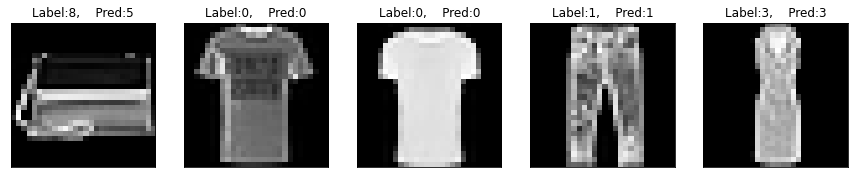

In [17]:
val = np.random.randint(0,len(test_labels),5)
nn = ['Label','Prediction','Image']
plt.figure(figsize=(len(val)*3,3))
for i, idx in enumerate(val):
  plt.subplot(1,len(val),i+1)
  plt.title('Label:{},    Pred:{}'.format(test_labels[idx],np.argmax(classifications[idx])))
  plt.imshow(test_images[idx],cmap='gray')
  plt.yticks([])
  plt.xticks([])
plt.show()
   #print(idx)

# Exploration Exercises

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [0]:
classifications = model.predict(test_images)

print(classifications[0])

[3.3625042e-07 4.8527327e-10 1.2890951e-10 6.3802230e-13 5.9740461e-09
 2.8955410e-03 9.9489128e-08 1.1032980e-02 5.6819937e-07 9.8607045e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [0]:
print(test_labels[0])

9


### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes



####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list




####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

##Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 



In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

#Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

#Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

#Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [0]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


